In [6]:
import pandas as pd

In [7]:
df = pd.read_excel("db/processed_data.xlsx")
df.head(2)

,Type,subject,body,opened,responded,meeting_link_click
0,example 1,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",0,0,0
1,example 1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",1,0,0


In [10]:
df["meeting_link_click"].value_counts()

0    108
1     46
Name: meeting_link_click, dtype: int64

In [11]:
df["subject"].value_counts()

🚀 Propel Your Marketing ROI with Advanced Analytics!       1
Re: Let’s Unlock Your Marketing Potential – Quick Chat?    1
Boost Your IT Efficiency 🚀                                 1
Re: Time to Elevate Your IT Game                           1
Let's Take Your IT to New Heights ✈️ - Last Chance         1
                                                          ..
Re: Next Step for Data-Driven Marketing?                   1
Unlock 🗝️ Growth with Tailored Marketing Analytics         1
Don't Miss Out: Your Competitive Edge Awaits!              1
🚀 Elevate Your Legal Strategies - Let's Partner Up!        1
Let's Make Data-Driven Decisions Together                  1
Name: subject, Length: 154, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Type', 'subject', 'body']]
y_opened = df['opened']
y_responded = df['responded']

# Split the data into training and testing sets
X_train, X_test, y_opened_train, y_opened_test, y_responded_train, y_responded_test = train_test_split(
    X, y_opened, y_responded, test_size=0.2, random_state=42
)

In [14]:
X_train.shape, X_test.shape

((123, 3), (31, 3))

In [15]:
y_opened_train.shape, y_opened_test.shape, y_responded_train.shape, y_responded_test.shape

((123,), (31,), (123,), (31,))

In [16]:
from catboost import CatBoostClassifier, Pool

def fit_catboost(X_train, X_test, y_train, y_test, catboost_params={}):
    learn_pool = Pool(
        X_train, 
        y_train,
        cat_features=['Type'],
        text_features=['subject', 'body'],
        feature_names=list(X_train)
    )
    test_pool = Pool(
        X_test, 
        y_test, 
        cat_features=['Type'],
        text_features=['subject', 'body'],
        feature_names=list(X_train)
    )
    
    catboost_default_params = {
        'iterations': 750,
        'learning_rate': 0.01,
        'eval_metric': 'Logloss',
        }

    
    catboost_default_params.update(catboost_params)
    
    model = CatBoostClassifier(**catboost_default_params)
    model.fit(learn_pool, eval_set=test_pool)

    return model

In [17]:
model1_opened = fit_catboost(X_train, X_test, y_opened_train, y_opened_test)

0:	learn: 0.6909746	test: 0.6897595	best: 0.6897595 (0)	total: 70.9ms	remaining: 53.1s
1:	learn: 0.6883659	test: 0.6867144	best: 0.6867144 (1)	total: 83.4ms	remaining: 31.2s
2:	learn: 0.6860054	test: 0.6835724	best: 0.6835724 (2)	total: 97.4ms	remaining: 24.3s
3:	learn: 0.6834135	test: 0.6803060	best: 0.6803060 (3)	total: 113ms	remaining: 21s
4:	learn: 0.6805075	test: 0.6769590	best: 0.6769590 (4)	total: 126ms	remaining: 18.8s
5:	learn: 0.6769981	test: 0.6732396	best: 0.6732396 (5)	total: 139ms	remaining: 17.2s
6:	learn: 0.6742866	test: 0.6692089	best: 0.6692089 (6)	total: 151ms	remaining: 16.1s
7:	learn: 0.6714014	test: 0.6663045	best: 0.6663045 (7)	total: 164ms	remaining: 15.2s
8:	learn: 0.6687396	test: 0.6621096	best: 0.6621096 (8)	total: 176ms	remaining: 14.5s
9:	learn: 0.6656442	test: 0.6587592	best: 0.6587592 (9)	total: 190ms	remaining: 14.1s
10:	learn: 0.6638007	test: 0.6557407	best: 0.6557407 (10)	total: 203ms	remaining: 13.6s
11:	learn: 0.6612171	test: 0.6526633	best: 0.652663

In [18]:
y_pred = model1_opened.predict_proba(X_test)
y_pred

array([[0.09154674, 0.90845326],
       [0.22587411, 0.77412589],
       [0.11506742, 0.88493258],
       [0.20244982, 0.79755018],
       [0.11531326, 0.88468674],
       [0.09756155, 0.90243845],
       [0.10822902, 0.89177098],
       [0.14681069, 0.85318931],
       [0.32541881, 0.67458119],
       [0.27155024, 0.72844976],
       [0.21018725, 0.78981275],
       [0.2589544 , 0.7410456 ],
       [0.06531603, 0.93468397],
       [0.11878734, 0.88121266],
       [0.15088577, 0.84911423],
       [0.16224716, 0.83775284],
       [0.07956882, 0.92043118],
       [0.13013179, 0.86986821],
       [0.11879832, 0.88120168],
       [0.30669038, 0.69330962],
       [0.19285006, 0.80714994],
       [0.15835439, 0.84164561],
       [0.22392453, 0.77607547],
       [0.62569643, 0.37430357],
       [0.22449441, 0.77550559],
       [0.24226979, 0.75773021],
       [0.23796314, 0.76203686],
       [0.44201634, 0.55798366],
       [0.15562341, 0.84437659],
       [0.18365983, 0.81634017],
       [0.

In [19]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

`Training Evaluation Metrics`

In [20]:
train_res = model1_opened.predict(X_train)

accuracy = accuracy_score(y_opened_train, train_res)
precision = precision_score(y_opened_train, train_res, average='weighted')
recall = recall_score(y_opened_train, train_res, average='weighted')
f1 = f1_score(y_opened_train, train_res, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

class_report = classification_report(y_opened_train, train_res)
print("Classification Report:\n", class_report)

# Confusion Matrix
cm = confusion_matrix(y_opened_train, train_res)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        87

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

Confusion Matrix:
 [[36  0]
 [ 0 87]]


`Test data Evaluation Metrics`

In [21]:
y_pred = model1_opened.predict(X_test)

accuracy = accuracy_score(y_opened_test, y_pred)
precision = precision_score(y_opened_test, y_pred, average='weighted')
recall = recall_score(y_opened_test, y_pred, average='weighted')
f1 = f1_score(y_opened_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8387096774193549
Precision: 0.7548387096774194
Recall: 0.8387096774193549
F1 Score: 0.7945670628183362


In [22]:
# Generate a classification report
class_report = classification_report(y_opened_test, y_pred)
print("Classification Report:\n", class_report)

# Confusion Matrix
cm = confusion_matrix(y_opened_test, y_pred)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.87      0.96      0.91        27

    accuracy                           0.84        31
   macro avg       0.43      0.48      0.46        31
weighted avg       0.75      0.84      0.79        31

Confusion Matrix:
 [[ 0  4]
 [ 1 26]]


In [23]:
feature_importance = model1_opened.get_feature_importance()
print("Feature Importance:\n", feature_importance)

Feature Importance:
 [ 0.         15.02409674 84.97590326]


In [29]:
# Create a CatBoost Pool from the test data
test_pool = Pool(
        X_test,
        y_opened_test, 
        cat_features=['Type'],
        text_features=['subject', 'body'],
        feature_names=list(X_train)
    )

feature_importances = model1_opened.get_feature_importance(data=test_pool, type='PredictionValuesChange')

# Map feature names to their importance scores
feature_importance_dict = dict(zip(X_test.columns, feature_importances))

# Print or visualize the feature importances
print("Feature Importances:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importances:
body: 79.5952013671274
subject: 20.40479863287274
Type: 0.0


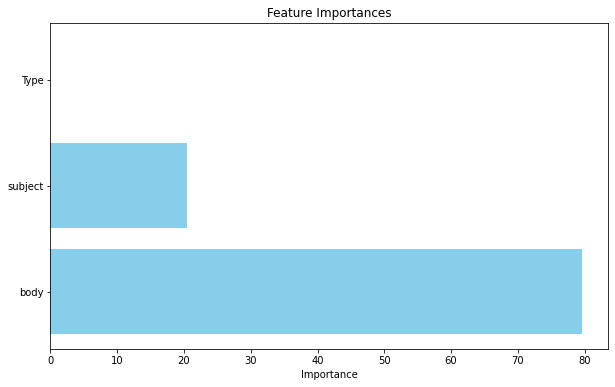

In [30]:
# Sort the features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance values
features, importances = zip(*sorted_features)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

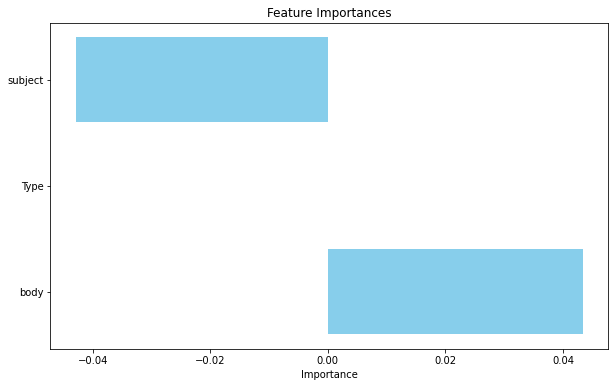

In [31]:
# Get the feature importance values
feature_importance = model1_opened.get_feature_importance(test_pool, type='LossFunctionChange')

# Get feature names
feature_names = model1_opened.feature_names_

# Create a dictionary of feature importance values
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance values
features, importances = zip(*sorted_features)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

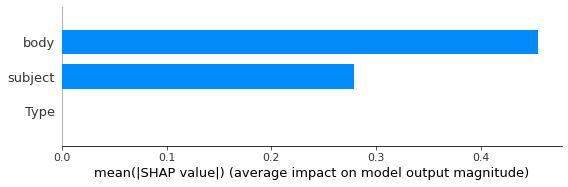

In [36]:
# Use SHAP values to explain the model's predictions
import shap
explainer = shap.TreeExplainer(model1_opened)
shap_values = explainer.shap_values(test_pool)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, feature_names=model1_opened.feature_names_, plot_type='bar')

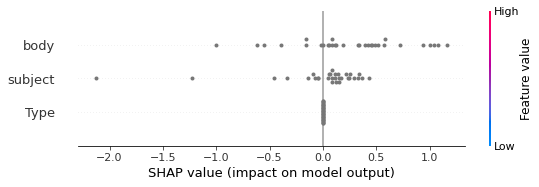

In [39]:
explainer = shap.TreeExplainer(model1_opened)
shap_values = explainer.shap_values(test_pool)

# Get the feature names (words in your case)
feature_names = X_test.columns  # Assuming X_test is a DataFrame

# Create a summary plot for all instances
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

### Issues with the Mail Opening Prediction Model and Possible Solutions:

1. **Overfitting**: 

The model exhibits overfitting, failing to accurately predict negative cases during testing. This may stem from an imbalance in the training data, with the negative class (0) being a minority. Strategies like data augmentation or additional data collection could address this issue.

2. **Sample Size**: 

The reduced performance might be attributed to a limited number of samples. Increasing the dataset size through techniques like augmentation or more data collection can aid the model in generalizing better to unseen instances.

3. **Raw Data Usage and Data Cleaning for Performance Boosting**: 

The model, CatBoost, is trained on raw data. Exploring various NLP data cleaning and preprocessing techniques can potentially enhance the classifier's performance. Text Standardization, Stopword Removal, non-utf-8 encoded character removal other NLP text cleaning can help in enhancing the performance.

4. **Model Interpretability**:

Consider using RandomForest and other simpler algorithms for model interpretation using tools like ELI5. This can provide insights into the significant words influencing predictions.


5. **Complexity of Algorithms**:

Using deep learning approaches and state-of-the-art embeddings can help capture the sematicity (context) of the data and predict accordingly. To capture bi-directional context, trying out Bi-directional LSTMs can help.

### `Next Steps`

1. **Text Classification Enhancements**:

Develop text classifiers for `Responded` and `Meeting Click` features as target variable to create a comprehensive pipeline. These models will provide confidence scores, indicating the likelihood of various email events:

Predict the probability of the recipient opening the email.
Estimate the chances of the recipient clicking on the meeting link.
Determine the likelihood of receiving a response.


2. **Airflow Pipeline Integration**:

Integrate these classifiers into an Airflow pipeline, enabling efficient and scheduled processing of a large volume of emails. Consider the following aspects, namely - Parallel or Sequential Execution, Task Dependencies, Monitoring and Logging, Scalability, Scheduling, Integration with MLflow or Similar Tools, Automated Notifications, Error Handling, and Security Measures.


3. **Containerization techniques**:

Use Docker to encapsulate ML models for consistent deployment across environments.
Leverage Docker's portability, scalability, and versioning benefits.
Integrate containers into CI/CD pipelines for automated testing and deployment.


4. **Next Steps**:

Implement a monitoring solution for real-time model performance tracking.
Explore model retraining strategies based on new data patterns.
Consider A/B testing to evaluate the effectiveness of model updates.
Establish a feedback loop to gather insights from end-users for continuous improvement.